### Model Calibration Issue

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_poor = LogisticRegression(max_iter=200)
model_poor.fit(X_train, y_train)

In [ ]:
y_prob_poor = model_poor.predict_proba(X_test)[:, 1]

In [ ]:
prob_true, prob_pred = calibration_curve(y_test, y_prob_poor, n_bins=10)

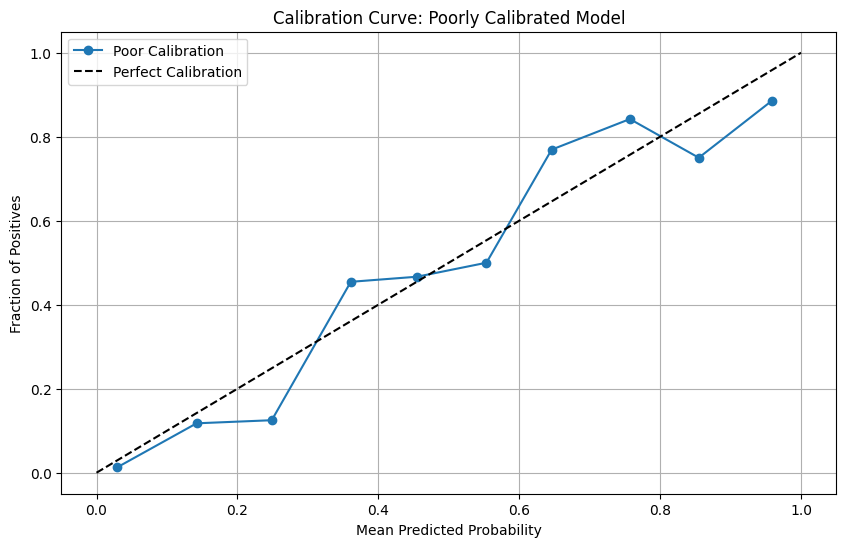

Brier Score (Poor Calibration): 0.11935475712556434


In [3]:
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Poor Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
plt.title("Calibration Curve: Poorly Calibrated Model")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid()
plt.show()
print("Brier Score (Poor Calibration):", brier_score_loss(y_test, y_prob_poor))


In [ ]:
model_calibrated = CalibratedClassifierCV(estimator=model_poor, method='sigmoid')
model_calibrated.fit(X_train, y_train)

In [ ]:
y_prob_good = model_calibrated.predict_proba(X_test)[:, 1]

In [ ]:

prob_true_good, prob_pred_good = calibration_curve(y_test, y_prob_good, n_bins=10)

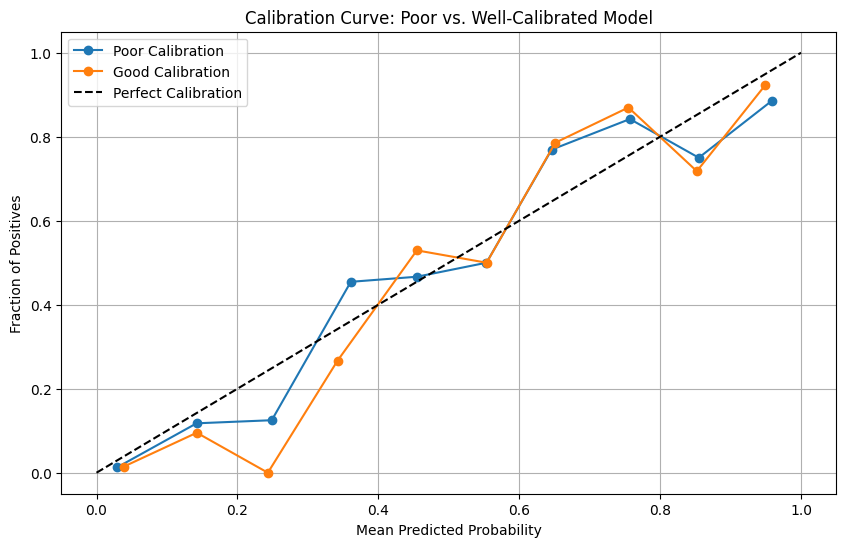

Brier Score (Good Calibration): 0.11987814793625373


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Poor Calibration")
plt.plot(prob_pred_good, prob_true_good, marker='o', label="Good Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
plt.title("Calibration Curve: Poor vs. Well-Calibrated Model")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid()
plt.show()

print("Brier Score (Good Calibration):", brier_score_loss(y_test, y_prob_good))


### Model Fairness Issue

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd


In [ ]:
np.random.seed(0)
ages = np.random.randint(20,60,size=1000)
incomes = np.random.randint(50000, 150000, size=1000)

In [ ]:
# Introducing bias: younger people are less likely to get approved, regardless of income
approvals = np.where(ages < 30, 0, 1)  # If age is less than 30, approval is 0, otherwise 1

In [ ]:
mask = np.random.choice([True, False], size=1000, p=[0.1, 0.9])
approvals[mask] = 1 - approvals[mask]

In [ ]:
data = pd.DataFrame({
    'Age': ages,
    'Income': incomes,
    'Approved': approvals
})

X = data[['Age', 'Income']]
y = data['Approved']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

In [11]:
same_income = 100000
younger_person = [[25, same_income]]
older_person = [[55, same_income]]

print("Prediction for a 25-year-old with an income of $100,000:", model.predict(younger_person))
print("Prediction for a 55-year-old with an income of $100,000:", model.predict(older_person))

Model Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        56
           1       0.91      1.00      0.95       144

    accuracy                           0.93       200
   macro avg       0.95      0.87      0.90       200
weighted avg       0.93      0.93      0.92       200

Confusion Matrix:
 [[ 41  15]
 [  0 144]]
Prediction for a 25-year-old with an income of $100,000: [0]
Prediction for a 55-year-old with an income of $100,000: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
np.random.seed(0)
ages = np.random.randint(20, 60, size=1000)
incomes = np.random.randint(50000, 150000, size=1000)

In [ ]:
approvals = np.where(incomes > 80000, 1, 0)  # If income is greater than 80,000, approval is 1, otherwise 0

In [ ]:
mask = np.random.choice([True, False], size=1000, p=[0.1, 0.9])
approvals[mask] = 1 - approvals[mask]

In [ ]:
data = pd.DataFrame({
    'Age': ages,
    'Income': incomes,
    'Approved': approvals
})

X = data[['Age', 'Income']]
y = data['Approved']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

In [12]:
same_income = 100000
younger_person = [[25, same_income]]
older_person = [[55, same_income]]

print("Prediction for a 25-year-old with an income of $100,000:", model.predict(younger_person))
print("Prediction for a 55-year-old with an income of $100,000:", model.predict(older_person))

Model Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        60
           1       0.92      0.88      0.90       140

    accuracy                           0.86       200
   macro avg       0.83      0.85      0.84       200
weighted avg       0.87      0.86      0.86       200

Confusion Matrix:
 [[ 49  11]
 [ 17 123]]
Prediction for a 25-year-old with an income of $100,000: [1]
Prediction for a 55-year-old with an income of $100,000: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

In [ ]:
# Add a shortcut feature
X_shortcut = np.hstack((X, (X[:, 0] > 0.5).reshape(-1, 1)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shortcut, y, test_size=0.2, random_state=42)

In [ ]:
model_shortcut = LogisticRegression()
model_shortcut.fit(X_train[:, 2].reshape(-1, 1), y_train)

In [ ]:
model_fair = LogisticRegression()
model_fair.fit(X_train[:, :2], y_train)

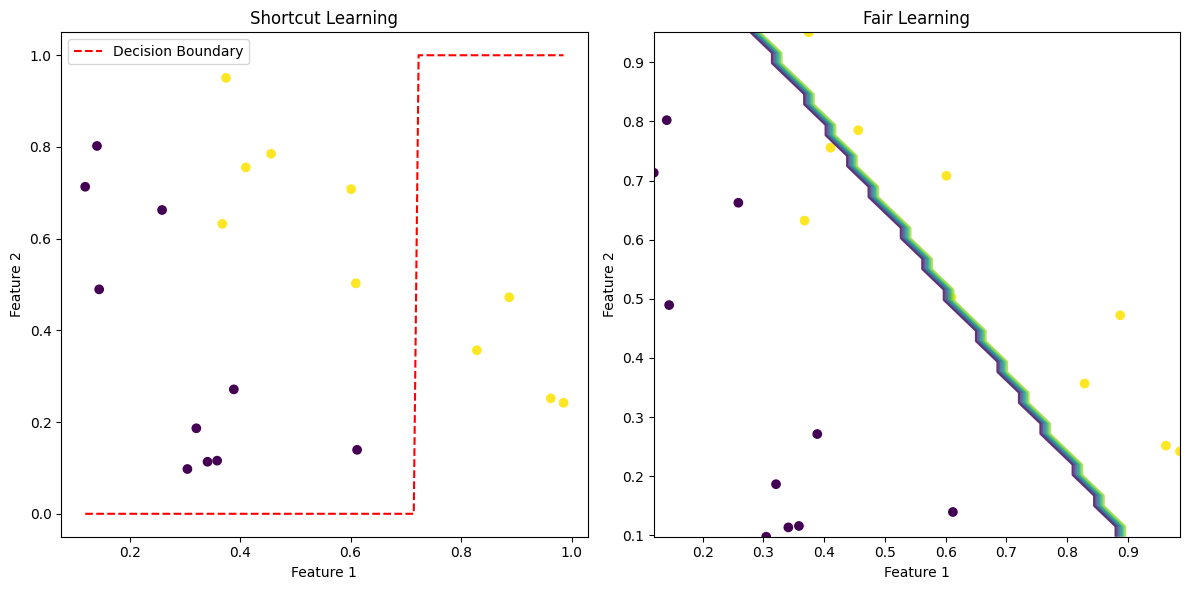

In [18]:
# Plot the data and decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
xx = np.linspace(x_min, x_max, 100)
Z = model_shortcut.predict(xx.reshape(-1, 1))
plt.plot(xx, Z, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Shortcut Learning")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
y_min, y_max = X_test[:, 1].min(), X_test[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = model_fair.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Fair Learning")

plt.tight_layout()
plt.show()